In [1]:
import numpy as np
import pandas as pd
import warnings 
import matplotlib.pyplot as plt

from Functions import *

from scipy.stats.mstats import winsorize
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score

In [2]:
warnings.filterwarnings('ignore')

In [3]:
# Training data
# Load csv file and fill the missing value with columns means
Training_Set = pd.read_csv('cs-training.csv').drop(columns='Unnamed: 0')
Training_Set = Training_Set.fillna(Training_Set.mean()).copy()

# Testing data
Test_Set = pd.read_csv('cs-test.csv').drop(columns='Unnamed: 0')
Test_Set = Test_Set.fillna(Test_Set.mean()).copy()

In [4]:
# Preprocessing data (normalization)
Y_Train = Training_Set['SeriousDlqin2yrs'].values
Y_Test = np.round(pd.read_csv('sampleEntry.csv')['Probability'].values).astype(int)

# Select two features
# RevolvingUtilizationOfUnsecuredLine, DebtRatio
Features = ['RevolvingUtilizationOfUnsecuredLines', 'DebtRatio']
_X_Train_, _X_Test_ = RemoveOutlier(Training_Set[Features]).values, RemoveOutlier(Test_Set[Features]).values

Scaler = StandardScaler()
Scaler.fit(_X_Train_)

X_Train, X_Test = Scaler.transform(_X_Train_), Scaler.transform(_X_Test_)

# X_Combined, Y_Combined = np.vstack((X_Train, X_Test)), np.hstack((Y_Train, Y_Test))

In [5]:
# Logistic regression model
LR_Accuracy = []
for c in np.linspace(0.01, 100, 10):
    LR = LogisticRegression(penalty='l1', C=c, solver='liblinear', multi_class='ovr')
    LR.fit(X_Train, Y_Train)
    
    Y_Fitted = LR.predict_proba(X_Test)[:, 1]

    LR_Accuracy.append(accuracy_score(Y_Test, np.round(Y_Fitted, 0).astype(int)))  

In [6]:
# SVM model
SVM_Accuracy = []
for c in np.linspace(0.01, 100, 10):
    _Accuracy_ = []
    for g in np.linspace(1, 100, 10):
        SVM = SVC(kernel='linear', C=c, gamma=g, tol=0.01, max_iter=100)
        SVM.fit(X_Train, Y_Train)

        Y_Fitted = SVM.predict(X_Test)

        _Accuracy_.append(accuracy_score(Y_Test, np.round(Y_Fitted, 0).astype(int)))  
    SVM_Accuracy.append(_Accuracy_)

In [7]:
# Decision tree model
Tree_Accuracy = []
for d in np.linspace(1, 10, 10):
   
    Tree = DecisionTreeClassifier(criterion='gini', max_depth=d)
    Tree.fit(X_Train, Y_Train)

    Y_Fitted = Tree.predict(X_Test)

    Tree_Accuracy.append(accuracy_score(Y_Test, np.round(Y_Fitted, 0).astype(int)))  

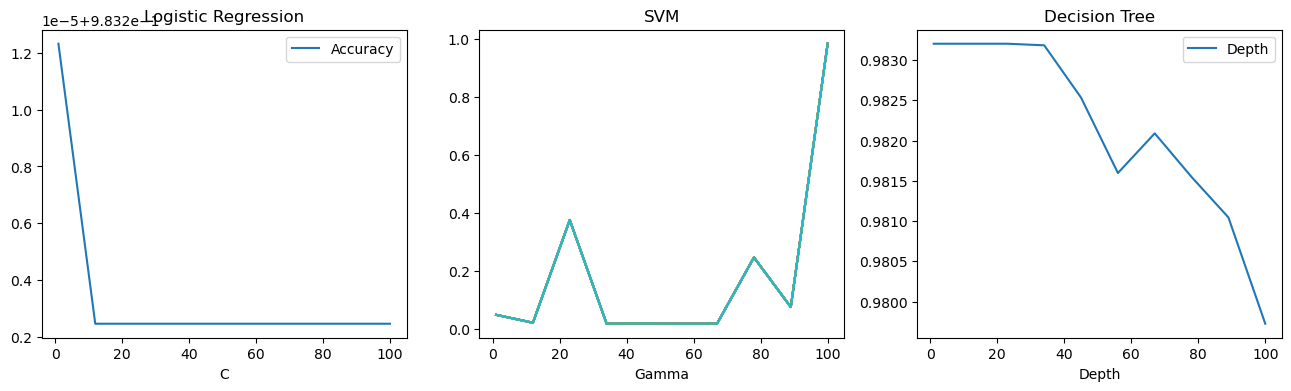

In [8]:
# Plot accuracy
fig = plt.figure(figsize=(16,4))

plt.subplot(131)
plt.plot(np.linspace(1, 100, 10), LR_Accuracy, label='Accuracy')
plt.title('Logistic Regression')
plt.xlabel('C')
plt.legend()

plt.subplot(132)
plt.plot(np.linspace(1, 100, 10), SVM_Accuracy)
plt.title('SVM')
plt.xlabel('Gamma')

plt.subplot(133)
plt.plot(np.linspace(1, 100, 10), Tree_Accuracy, label='Depth')
plt.title('Decision Tree')
plt.xlabel('Depth')
plt.legend()

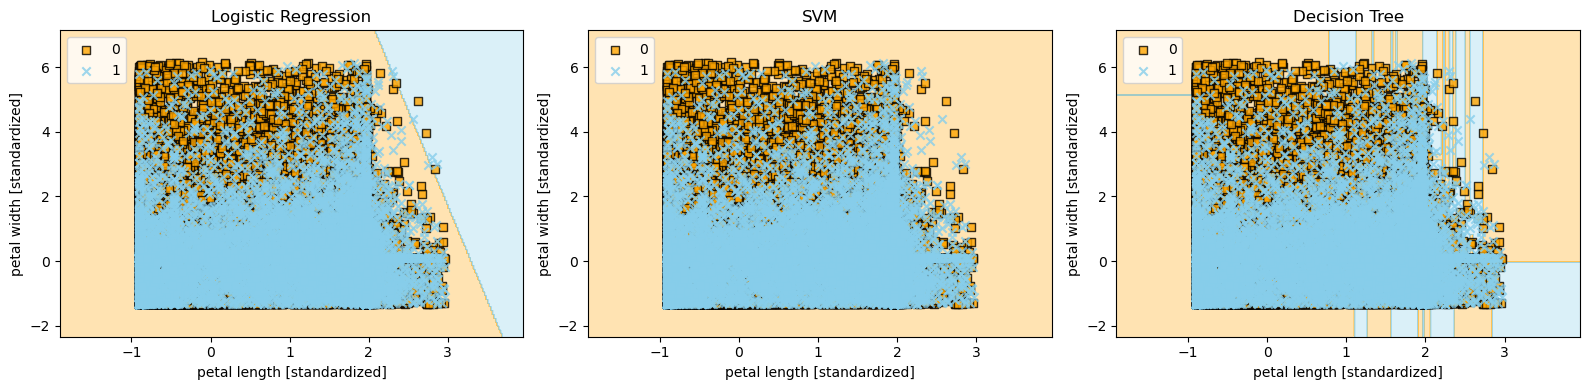

In [9]:
# Plot classifier
LR = LogisticRegression(penalty='l1', C=10, random_state=1, solver='liblinear', multi_class='ovr')
LR.fit(X_Train, Y_Train)

SVM = SVC(kernel='rbf', C=10, gamma=10.0, random_state=1, tol=0.01, max_iter=500)
SVM.fit(X_Train, Y_Train)

Tree = DecisionTreeClassifier(criterion='gini', max_depth=10, random_state=1)
Tree.fit(X_Train, Y_Train)

fig = plt.figure(figsize=(16, 4))

plt.subplot(131)
plot_decision_regions(X_Train, Y_Train, classifier=LR)
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.title('Logistic Regression')
plt.legend(loc='upper left')
plt.tight_layout()

plt.subplot(132)
plot_decision_regions(X_Train, Y_Train, classifier=SVM)
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.title('SVM')
plt.legend(loc='upper left')
plt.tight_layout()

plt.subplot(133)
plot_decision_regions(X_Train, Y_Train, classifier=Tree)
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.title('Decision Tree')
plt.legend(loc='upper left')
plt.tight_layout()

plt.show()